# WIP code for downloading and transforming OPENSENSE example datasets 

## A universal function for downloading example data files 

In [1]:
def download_data_file(url, local_path='.', local_file_name=None, print_output=False):
    import os
    import urllib
    
    if not os.path.exists(local_path):
        if print_output:
            print(f'Creating path {local_path}')
        os.makedirs(local_path)
    
    if local_file_name is None:
        local_file_name = url.split('/')[-1]
    
    if os.path.exists(os.path.join(local_path, local_file_name)):
        print(f'File already exists at desired location {os.path.join(local_path, local_file_name)}')
        print('Not downloading!')
        return
    
    if print_output:
        print(f'Downloading {url}')
        print(f'to {local_path}/{local_file_name}')
        
    return_message = urllib.request.urlretrieve(url, os.path.join(local_path, local_file_name))
        

## Build some downloaders for specific datasets 

In [2]:
from functools import partial
download_pycomlink_example_data = partial(
    download_data_file,
    url='https://github.com/pycomlink/pycomlink/raw/master/pycomlink/io/example_data/example_cml_data.nc',
)

download_fencl_2021_Eband_data = partial(
    download_data_file,
    url='https://zenodo.org/record/5013463/files/Dataset_1.0.0.zip',
)

download_overeem_2019_large_CML_data_Netherlands = partial(
    download_data_file,
    url='https://data.4tu.nl/ndownloader/files/24025658',
    local_file_name='data.zip',
)

## Test the downloaders
Note that the Overeem 2019 dataset has approx 500MB, hence, it takes some time to download

In [3]:
download_pycomlink_example_data(local_path='pycomlink_example_data', print_output=True)

File already exists at desired location pycomlink_example_data/example_cml_data.nc
Not downloading!


In [4]:
download_fencl_2021_Eband_data(local_path='fencl_2021_Eband_data')

File already exists at desired location fencl_2021_Eband_data/Dataset_1.0.0.zip
Not downloading!


In [5]:
download_overeem_2019_large_CML_data_Netherlands(local_path='overeem_2019_large_CML_data_Netherlands')

File already exists at desired location overeem_2019_large_CML_data_Netherlands/data.zip
Not downloading!


In [6]:
ls -trlh

total 1.1M
-rw-r--r-- 1 graf-m Domain Users 1.5K May  5 08:18 LICENSE
drwxr-xr-x 2 graf-m Domain Users 4.0K May  5 08:18 RAINLINK/
-rw-r--r-- 1 graf-m Domain Users  223 May  5 08:18 README.md
-rw-r--r-- 1 graf-m Domain Users  167 May  5 08:18 environment.yml
-rw-r--r-- 1 graf-m Domain Users 126K May  5 08:18 intro_to_R.ipynb
drwxr-xr-x 2 graf-m Domain Users 4.0K May  5 08:18 pycomlink/
drwxr-xr-x 2 graf-m Domain Users 4.0K May  5 08:20 pycomlink_example_data/
drwxr-xr-x 2 graf-m Domain Users 4.0K May  5 08:21 fencl_2021_Eband_data/
drwxr-xr-x 2 graf-m Domain Users 4.0K May  5 08:50 overeem_2019_large_CML_data_Netherlands/
-rw-r--r-- 1 graf-m Domain Users 195K May  5 08:51 opensense_data_downloader_and_transformer.ipynb


In [7]:
ls -lh pycomlink_example_data/

total 5.5M
-rw-r--r-- 1 graf-m Domain Users 5.3M May  5 08:20 example_cml_data.nc


In [8]:
ls -lh fencl_2021_Eband_data/

total 6.0M
-rw-r--r-- 1 graf-m Domain Users 6.0M May  5 08:21 Dataset_1.0.0.zip


In [9]:
ls -lh overeem_2019_large_CML_data_Netherlands/

total 595M
-rw-r--r-- 1 graf-m Domain Users  17M May  5 08:50 Netherland_CMLS_2011.nc
-rw-r--r-- 1 graf-m Domain Users  16M May  5 08:47 Netherland_CMLS_2012.nc
-rw-r--r-- 1 graf-m Domain Users 563M May  5 08:21 data.zip


# Open example NetCDF file 

In [10]:
import xarray as xr

ds_cml_pycomlink = xr.open_dataset('pycomlink_example_data/example_cml_data.nc')
ds_cml_pycomlink

<xarray.Dataset>
Dimensions:           (time: 15840, cml_id: 500, channel_id: 2)
Coordinates:
  * time              (time) datetime64[ns] 2018-05-10 ... 2018-05-20T23:59:00
  * cml_id            (cml_id) object 'FY0013_2_FY1257_3' ... 'SY8534_2_SY237...
    length            (cml_id) float64 ...
    site_a_latitude   (cml_id) float64 ...
    site_a_longitude  (cml_id) float64 ...
    site_b_latitude   (cml_id) float64 ...
    site_b_longitude  (cml_id) float64 ...
  * channel_id        (channel_id) object 'channel_1' 'channel_2'
    frequency         (cml_id, channel_id) float64 ...
    polarization      (cml_id, channel_id) object ...
Data variables:
    rsl               (channel_id, cml_id, time) float32 ...
    tsl               (channel_id, cml_id, time) float32 ...

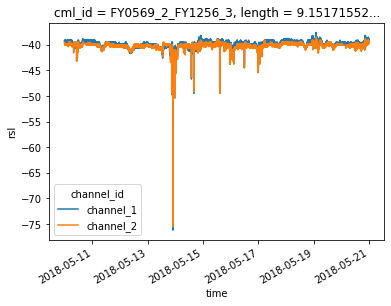

In [11]:
ds_cml_pycomlink.isel(cml_id=13).rsl.plot.line(x='time');

## Get data from ZIP files
as example we use the Overeem 2019 dataset

In [12]:
import zipfile
import pandas as pd

with zipfile.ZipFile('overeem_2019_large_CML_data_Netherlands/data.zip') as zfile:
    f = zfile.open('CMLs_20120530_20120901.dat')
    df2012 = pd.read_csv(
        f,
        nrows=1000000, # not reading the full file here to save time
        sep="\s+", 
        skiprows=1,   
        names=['frequency','datetime','pmin','pmax','pathlength','xstart','ystart','xend','yend','id'],
    )

# set correct date index
df2012 = df2012.set_index(pd.to_datetime(df2012['datetime'], format='%Y%m%d%H%M'))

In [13]:
df2012.head()

,frequency,datetime,pmin,pmax,pathlength,xstart,ystart,xend,yend,id
datetime,,,,,,,,,,
2012-05-30 00:15:00,37.978,201205300015,-49,-48,0.96381,5.91156,51.98303,5.92423,51.98675,952
2012-05-30 00:15:00,38.003,201205300015,-53,-53,5.43232,5.88453,52.12453,5.95620,52.10362,953
2012-05-30 00:15:00,39.263,201205300015,-56,-55,2.14079,5.72408,52.02102,5.75525,52.02030,954
2012-05-30 00:15:00,38.003,201205300015,-56,-56,1.28193,6.09943,52.04319,6.09032,52.05325,958
2012-05-30 00:15:00,37.978,201205300015,-44,-43,3.67305,6.05354,52.02008,6.08431,51.99307,957


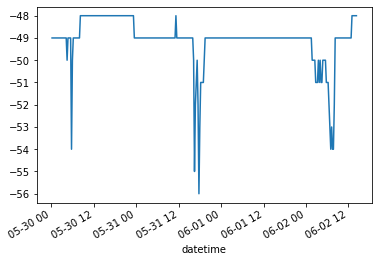

In [14]:
df2012_one_cml = df2012[df2012.id==df2012.id[0]]
df2012_one_cml.pmin.plot();

#### Convert csv data to netcdf

In [16]:
import numpy as np
ds_list = []
all_date_time = xr.cftime_range(str(df2012.index.min()), str(df2012.index.max()), freq="15min")
for cml_id in np.unique(df2012.id):
    df_sel = df2012[df2012["id"] == cml_id]
    
    # identical cml_ids with duplicate date time entries probably 
    # probaly stem from uncorrect metadata, these are listet here and discarded for now
    if df_sel.index.duplicated().sum() > 0:
        print("cml "+str(cml_id)+" has "+str(df_sel.index.duplicated().sum())
              +" duplicated entries from "+ str(len(df_sel))+ " rows."
        )
    df_sel = df_sel[~df_sel.index.duplicated()]
   
    ds_list.append(
        xr.Dataset(
            data_vars=dict(
                pmin=("time", df_sel.pmin.values), pmax=("time", df_sel.pmax.values)
            ),
            coords=dict(
                time=df_sel.index.values,
                cml_id=df_sel.id.values[0],
                length=df_sel.pathlength.values[0],
                frequency=df_sel.frequency.values[0],
                site_a_longitude=df_sel.ystart.values[0],
                site_b_longitude=df_sel.yend.values[0],
                site_a_latitude=df_sel.xstart.values[0],
                site_b_latitude=df_sel.xend.values[0],
            ),
        )
    )

cml 295 has 342 duplicated entries from 684 rows.
cml 319 has 342 duplicated entries from 684 rows.
cml 341 has 342 duplicated entries from 684 rows.
cml 369 has 340 duplicated entries from 685 rows.
cml 602 has 343 duplicated entries from 686 rows.
cml 857 has 345 duplicated entries from 691 rows.
cml 892 has 343 duplicated entries from 686 rows.
cml 928 has 344 duplicated entries from 688 rows.
cml 1039 has 345 duplicated entries from 690 rows.
cml 1133 has 336 duplicated entries from 681 rows.
cml 1146 has 345 duplicated entries from 690 rows.
cml 1442 has 342 duplicated entries from 685 rows.
cml 1737 has 346 duplicated entries from 692 rows.
cml 1805 has 337 duplicated entries from 679 rows.
cml 1910 has 345 duplicated entries from 690 rows.
cml 1996 has 342 duplicated entries from 684 rows.
cml 2079 has 345 duplicated entries from 690 rows.
cml 2099 has 342 duplicated entries from 684 rows.
cml 2109 has 342 duplicated entries from 684 rows.
cml 2310 has 345 duplicated entries fro

In [17]:
# concat all individual xarray datasets
ds2012 = xr.concat(ds_list, dim="cml_id")

In [18]:
ds2012

<xarray.Dataset>
Dimensions:           (time: 346, cml_id: 2908)
Coordinates:
  * time              (time) datetime64[ns] 2012-05-30T00:15:00 ... 2012-06-0...
  * cml_id            (cml_id) int64 1 2 3 4 5 6 ... 2904 2905 2906 2907 2908
    length            (cml_id) float64 6.285 3.318 2.546 ... 4.613 1.952 1.441
    frequency         (cml_id) float64 25.35 37.98 39.17 ... 37.98 39.17 39.38
    site_a_longitude  (cml_id) float64 51.76 51.43 51.74 ... 52.1 51.39 52.35
    site_b_longitude  (cml_id) float64 51.73 51.4 51.76 ... 52.08 51.41 52.35
    site_a_latitude   (cml_id) float64 3.854 3.811 3.843 ... 4.465 5.475 4.892
    site_b_latitude   (cml_id) float64 3.775 3.792 3.854 ... 4.4 5.465 4.871
Data variables:
    pmin              (cml_id, time) float64 -53.0 -53.0 -53.0 ... nan nan nan
    pmax              (cml_id, time) float64 -53.0 -52.0 -53.0 ... nan nan nan

#### Some plots of the dataset

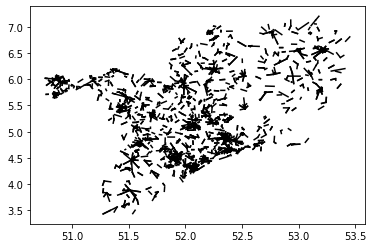

In [19]:
import matplotlib.pyplot as plt
for lon1, lat1, lon2, lat2 in zip(
    ds2012.site_a_longitude, 
    ds2012.site_a_latitude,
    ds2012.site_b_longitude, 
    ds2012.site_b_latitude):
    
    plt.plot([lon1, lon2], [lat1, lat2], "-", c="black")

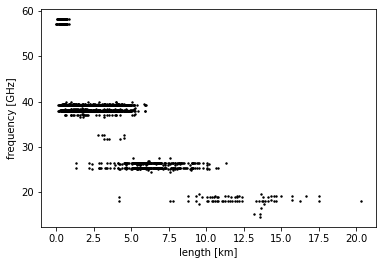

In [20]:
plt.scatter(ds2012.length.values,ds2012.frequency.values,s=2,color='black')
plt.xlabel("length [km]")
plt.ylabel("frequency [GHz]");

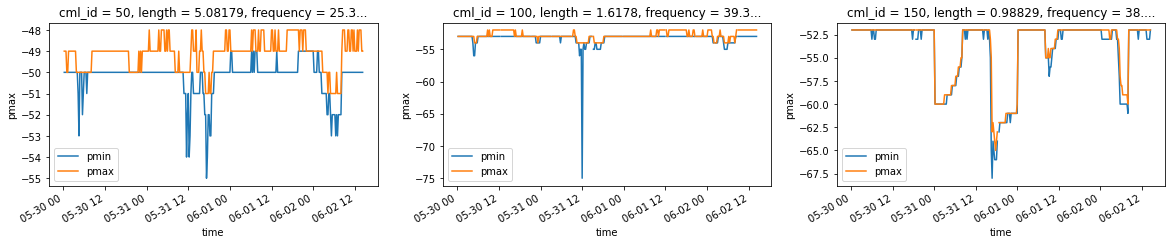

In [21]:
fig,ax=plt.subplots(ncols=3,figsize=(20,3))
for i,j in zip([49,99,149],[0,1,2]):
    ds2012.isel(cml_id=i).pmin.plot(label="pmin",ax=ax[j])
    ds2012.isel(cml_id=i).pmax.plot(label="pmax",ax=ax[j])
    ax[j].legend()

In [22]:
ds2012.to_netcdf("overeem_2019_large_CML_data_Netherlands/Netherland_CMLS_2012.nc")